In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# fetch dataset
spambase = fetch_ucirepo(id=94)

In [4]:
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [5]:
# variable information
print(spambase.variables)

                          name     role        type demographic  \
0               word_freq_make  Feature  Continuous        None   
1            word_freq_address  Feature  Continuous        None   
2                word_freq_all  Feature  Continuous        None   
3                 word_freq_3d  Feature  Continuous        None   
4                word_freq_our  Feature  Continuous        None   
5               word_freq_over  Feature  Continuous        None   
6             word_freq_remove  Feature  Continuous        None   
7           word_freq_internet  Feature  Continuous        None   
8              word_freq_order  Feature  Continuous        None   
9               word_freq_mail  Feature  Continuous        None   
10           word_freq_receive  Feature  Continuous        None   
11              word_freq_will  Feature  Continuous        None   
12            word_freq_people  Feature  Continuous        None   
13            word_freq_report  Feature  Continuous        Non

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
Accuracy=[]
regularization=[0,0.001,0.1,1,10,100]

In [ ]:
print(y_train.shape)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

(3680, 1)


In [15]:
def metrics(y_test,y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    Accuracy.append(accuracy)



# Without Regularization

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)

Accuracy: 0.9457111834961998
Precision: 0.9393139841688655
Recall: 0.9295039164490861
F1-Score: 0.9343832020997375


<h2> Regularization 0.001 <h2>

In [ ]:
svm_classifier = SVC(C=0.001, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
metrics(y_test,y_pred)

Accuracy: 0.8849077090119435
Precision: 0.9037900874635568
Recall: 0.8093994778067886
F1-Score: 0.8539944903581267


<h2> Regularization 0.01 <h2>

In [ ]:
svm_classifier = SVC(C=0.1, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
metrics(y_test,y_pred)

Accuracy: 0.9446254071661238
Precision: 0.9414893617021277
Recall: 0.9242819843342036
F1-Score: 0.932806324110672


<h2> Regularization  1 </h2>

In [ ]:
svm_classifier = SVC(C=1, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
metrics(y_test,y_pred)

Accuracy: 0.9457111834961998
Precision: 0.9393139841688655
Recall: 0.9295039164490861
F1-Score: 0.9343832020997375


<h2> regularization 10 <h2>

In [ ]:
svm_classifier = SVC(C=10, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
metrics(y_test,y_pred)

Accuracy: 0.9424538545059717
Precision: 0.9319371727748691
Recall: 0.9295039164490861
F1-Score: 0.930718954248366


<h2>  regularization 100 </h2>

In [ ]:
svm_classifier = SVC(C=100, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
metrics(y_test,y_pred)

Accuracy: 0.9250814332247557
Precision: 0.9005102040816326
Recall: 0.9216710182767625
F1-Score: 0.9109677419354839


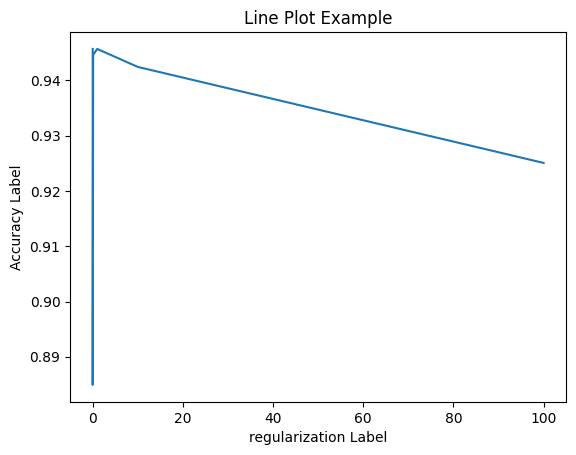

In [ ]:
plt.plot(regularization, Accuracy)
plt.xlabel('regularization Label')
plt.ylabel('Accuracy Label')
plt.title('Line Plot Example')
plt.show()

# kernel Tricks

In [16]:
Accuracy=[]
x_labels=['poly degree 2','poly degree 3','sigmoid','RBF']

In [17]:
svm_classifier = SVC(C=1, kernel='poly',degree = 2, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6579804560260586
Precision: 0.8695652173913043
Recall: 0.20887728459530025
F1-Score: 0.3368421052631579


In [18]:
svm_classifier = SVC(C=1, kernel='poly',degree = 3, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6362649294245385
Precision: 0.9615384615384616
Recall: 0.13054830287206268
F1-Score: 0.2298850574712644


In [19]:
svm_classifier = SVC(C=1, kernel='sigmoid',random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6384364820846905
Precision: 0.5672043010752689
Recall: 0.5509138381201044
F1-Score: 0.5589403973509933


In [20]:
svm_classifier = SVC(C=1, kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7176981541802389
Precision: 0.7530864197530864
Recall: 0.47780678851174935
F1-Score: 0.584664536741214


# Part C


In [21]:
Accuracy=[]
training_accuracy=[]

x_labels=['poly degree 1 c=0.01','poly degree 1 c=100','poly degree 3 c=0.01','poly degree 3 c=100']

In [22]:
svm_classifier = SVC(C=0.01, kernel='poly',degree = 1, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)
y_pred = svm_classifier.predict(X_train)
training_accuracy.append(accuracy_score(y_train, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6471226927252985
Precision: 0.8152173913043478
Recall: 0.195822454308094
F1-Score: 0.3157894736842105


In [23]:
svm_classifier = SVC(C=100, kernel='poly',degree = 1, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)
y_pred = svm_classifier.predict(X_train)
training_accuracy.append(accuracy_score(y_train, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7861020629750272
Precision: 0.8690476190476191
Recall: 0.5718015665796344
F1-Score: 0.6897637795275591


In [24]:
svm_classifier = SVC(C=0.01, kernel='poly',degree = 3, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)
y_pred = svm_classifier.predict(X_train)
training_accuracy.append(accuracy_score(y_train, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6232356134636265
Precision: 0.95
Recall: 0.09921671018276762
F1-Score: 0.1796690307328605


In [25]:
svm_classifier = SVC(C=100, kernel='poly',degree = 3, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
metrics(y_test,y_pred)
y_pred = svm_classifier.predict(X_train)
training_accuracy.append(accuracy_score(y_train, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6829533116178067
Precision: 0.9690721649484536
Recall: 0.2454308093994778
F1-Score: 0.39166666666666666


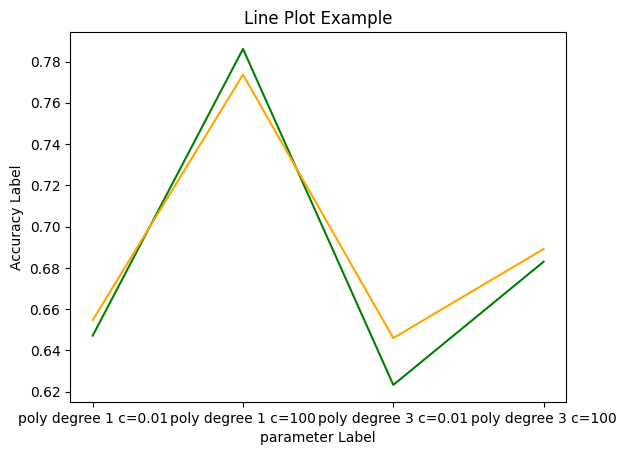

In [26]:
plt.plot(x_labels, Accuracy,'green')
plt.plot(x_labels, training_accuracy,'orange')
plt.xlabel('parameter Label')
plt.ylabel('Accuracy Label')
plt.title('Line Plot Example')
plt.show()